In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
%tensorflow_version 1.x

# for CNN's
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model

In [0]:
np.random.seed(0)

(60000, 28, 28)
(10000, 28, 28)


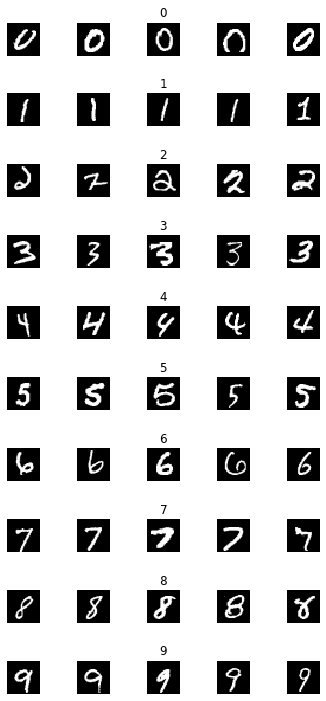

In [3]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
 
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


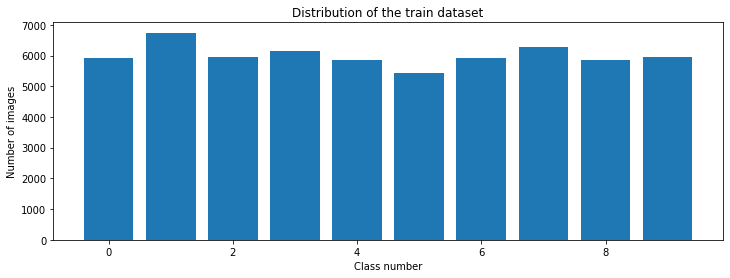

In [4]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
# LeNet based model
def leNet_model():
    model = Sequential()
    # Conv2D Params (filters, kernel_size, input_shape, activation, strides=1, padding='valid)
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    return model


In [9]:
model = leNet_model()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000   

In [63]:
history = model.fit(X_train, y_train, batch_size=400, epochs=6, validation_split=0.1, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/6
54000/54000 [==============================] - 1s 19us/step - loss: 0.0347 - acc: 0.9904 - val_loss: 0.0394 - val_acc: 0.9905
Epoch 2/6
54000/54000 [==============================] - 1s 18us/step - loss: 0.0390 - acc: 0.9899 - val_loss: 0.0450 - val_acc: 0.9908
Epoch 3/6
54000/54000 [==============================] - 1s 18us/step - loss: 0.0368 - acc: 0.9899 - val_loss: 0.0510 - val_acc: 0.9907
Epoch 4/6
54000/54000 [==============================] - 1s 19us/step - loss: 0.0409 - acc: 0.9893 - val_loss: 0.0425 - val_acc: 0.9897
Epoch 5/6
54000/54000 [==============================] - 1s 18us/step - loss: 0.0375 - acc: 0.9906 - val_loss: 0.0573 - val_acc: 0.9907
Epoch 6/6
54000/54000 [==============================] - 1s 18us/step - loss: 0.0345 - acc: 0.9903 - val_loss: 0.0406 - val_acc: 0.9920


Text(0.5, 0, 'epoch')

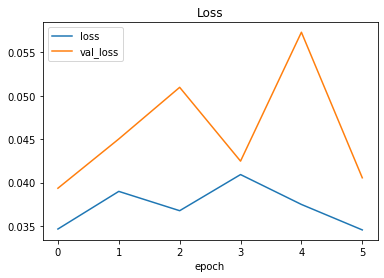

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

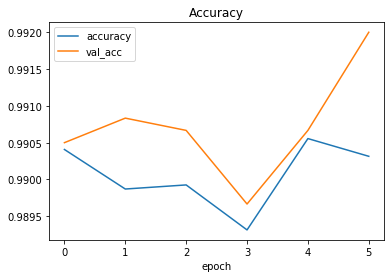

In [65]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['accuracy', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

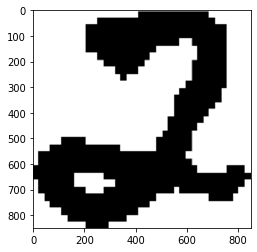

In [66]:
import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
# url = 'http://neuralnetworksanddeeplearning.com/images/mnist_complete_zero.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)


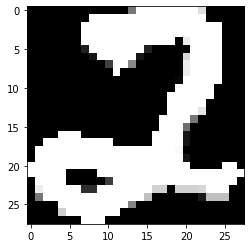

In [67]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)

plt.imshow(image, cmap=plt.get_cmap('gray'))

In [0]:
image = image / 255
image = image.reshape(1, 28, 28, 1)

In [69]:
prediction = model.predict_classes(image)
prediction_array = model.predict(image)[0]
print("Prediction", str(prediction))

for i in range(0, len(prediction_array)):
    print(i, prediction_array[i])

Prediction [2]
0 3.899905e-15
1 1.3239013e-10
2 0.9999865
3 1.7146131e-09
4 3.059925e-16
5 6.3684056e-18
6 9.789275e-20
7 1.3490935e-05
8 1.2463663e-14
9 8.5780816e-14


In [70]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

<class 'list'>
Test Score: 0.04811834141729869
Test Accuracy: 0.9893


In [71]:
# for debugging and visualization
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1 = layer1.predict(image)
visual_layer2 = layer2.predict(image)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


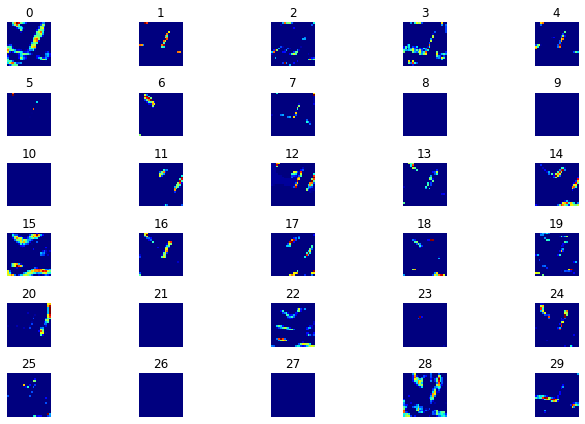

In [58]:
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.title(i)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')
plt.tight_layout()


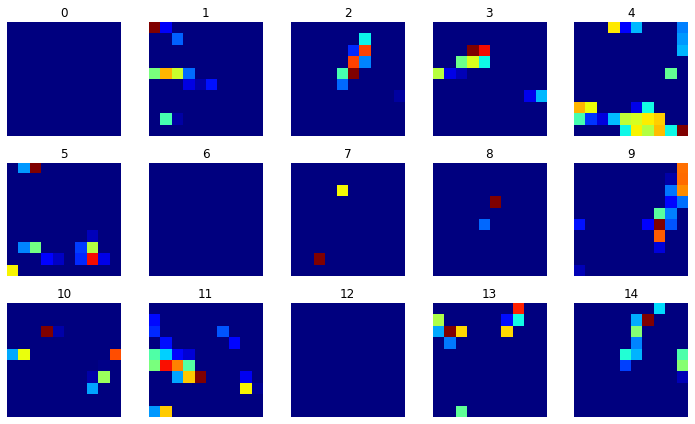

In [60]:
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.title(i)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')
plt.tight_layout()